# Distribution du nombre de *contacts* avant acquisition
## *Visualisation en 3D de "l'audace" du FNAC*

### 1. Chargement et nettoyage des données

In [3]:
import pandas as pd
from collections import defaultdict
from pprint import pprint


# Load FNAC data
data = pd.read_csv('uniq_artworks.csv')

# Get useful columns
data = data[['authors_list', 'acquisition_year']]

# Remove anonyms from data
data = data[data.authors_list != 'Anonyme (sans précision)']
data = data[data.authors_list != 'Anonyme (Ecole française)']

# Remove lines with NaNs
# Remove duplicates (--> reduce dataset to "contacts" only)
data = data.dropna().drop_duplicates()

data.head()

,authors_list,acquisition_year
7,AMORIM Manuel,1981
8,BERTHOLIN,1981
9,CULINER Jill,1981
10,"LARUS Eliane (TEXIER Eliane, dit)",1981
11,"AUBERTIN Denise A (DEMALDENT Denise, dit)",1981


## 2. Calcul des distribution par année de vie du FNAC

In [58]:
react_data = []

for year, grp in data.groupby('acquisition_year'):
    
    # Get acquired artists for current year
    acquired_artists = grp['authors_list'].unique()
    nb_acquired_artists = len(acquired_artists)
    
    # Init distribution
    distribution = defaultdict(lambda: 0)
    
    for artist in acquired_artists:
        
        # Get all contacts between the artist and FNAC
        contacts = data[data.authors_list == artist]
        
        # Get number of contacts that occured before current year
        nb_prev_contacts = len(contacts[contacts.acquisition_year < year]['acquisition_year'])
        
        # Update distribution 
        distribution[nb_prev_contacts] += (1 / nb_acquired_artists) * 100
            
    # Update result data
    react_data.append({'year': year, 'distribution': dict(distribution)})

# Save the data to csv
react_data = pd.DataFrame(react_data)
react_data.to_csv('fnac_acquisition_distri.csv', index=False)

## 3. Generate simple 3D viz

<IPython.core.display.Javascript object>


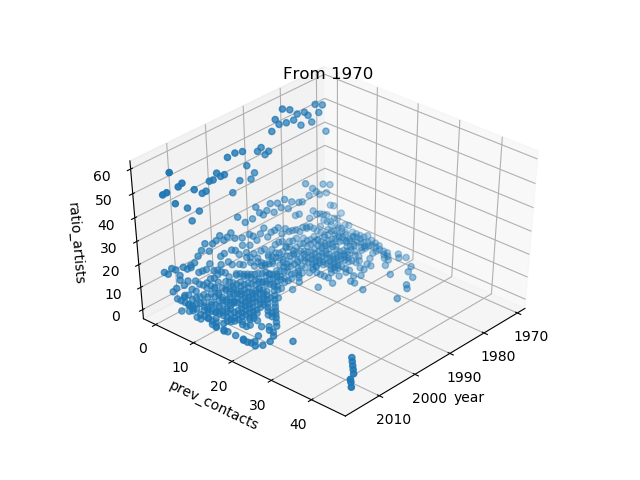

Text(0.5,0.92,'From 1970')

In [57]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


threeD = []
for row in react_data[react_data.year > 1970].iterrows():
    row = row[1].to_dict()
    for contact in row['distribution']:  
        threeD.append({'year': row['year'], 'prev_contact':contact, 'ratio_artists': row['distribution'][contact]})

xs = [x['year'] for x in threeD]
ys = [y['prev_contact'] for y in threeD]
zs = [z['ratio_artists'] for z in threeD]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs)
ax.set_xlabel('year')
ax.set_ylabel('prev_contacts')
ax.set_zlabel('ratio_artists')
ax.set_title('From 1970')